In [1]:
#libs 

import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
from datetime import datetime
from scipy.stats import linregress

import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = 'notebook'

In [2]:

#df = pd.read_csv('AvanzaAntalÄgare.csv', index_col=0)
df = pd.read_csv('AvanzaAntalÄgare.csv')
df = df.drop(columns=["Row"])
df = df.dropna()
df = df.rename(columns={"Antal ägare ▼": "Antal ägare"})


list_of_names = df.columns.tolist() 
list_of_names = list_of_names[1:]
print(list_of_names)


df[list_of_names[-1]] = (
    df[list_of_names[-1]]
    .astype(str)
    .str.replace(r"\s+", "", regex=True)   # tar bort space, \xa0, tab, allt
    .astype(int)
)

df[list_of_names] = (
    df[list_of_names]
    .astype(str)
    .apply(lambda col: col.str.replace(",", ".", regex=False))
)



df

['Utv. 1 år', 'Utv. 3 år', 'Utv. 5 år', 'Total avgift', 'Risk', 'Antal ägare']


,Namn,Utv. 1 år,Utv. 3 år,Utv. 5 år,Total avgift,Risk,Antal ägare
0,Avanza Zero,18.95,52.82,77.20,0.00,4,881295
1,Spiltan Aktiefond Investmentbolag,10.76,46.31,66.01,0.21,4,657767
2,Avanza Global,-1.07,54.85,95.94,0.10,4,628253
3,Länsförsäkringar Global Index,0.21,61.94,102.08,0.22,4,454947
4,Swedbank Robur Technology A,-1.74,108.29,139.58,1.38,5,213110
...,...,...,...,...,...,...,...
242,Finserve Chelverton Global Tech Fund A,5.48,119.43,100.80,1.54,5,3407
243,DNB Global Emerging Markets Indeks S,10.40,34.83,33.12,0.36,4,3390
244,C Worldwide Emerging Markets 1C,-2.63,15.16,0.62,2.40,4,3370
245,SEB Europa Indexnära C EUR - Lux,11.96,48.03,78.82,0.35,4,3322


In [3]:
df[list_of_names] = df[list_of_names].astype(float)

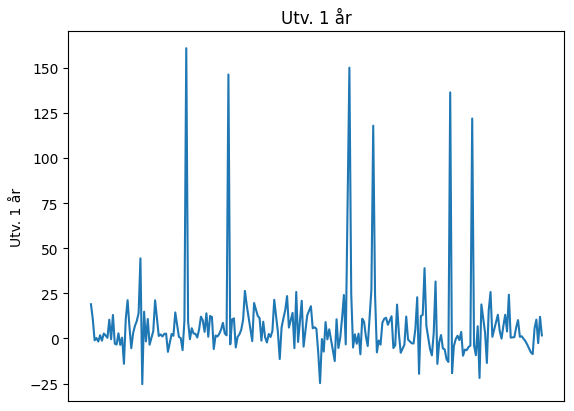

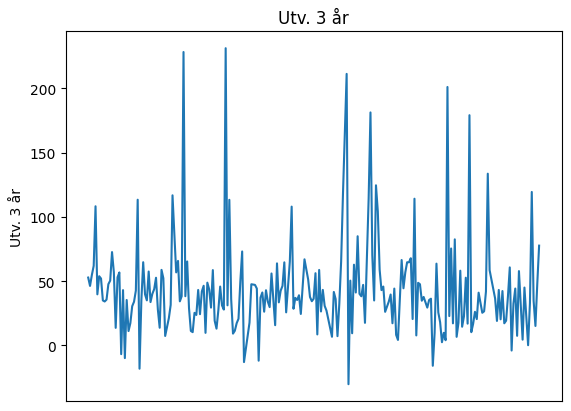

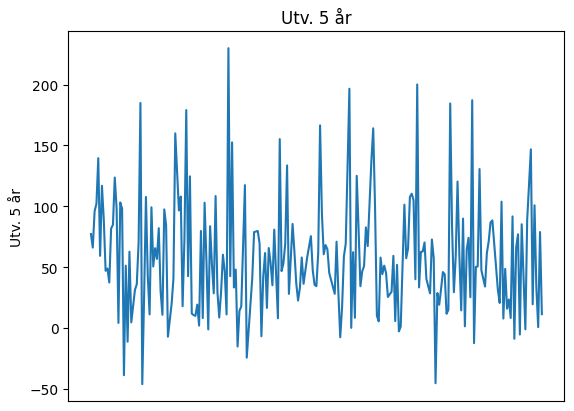

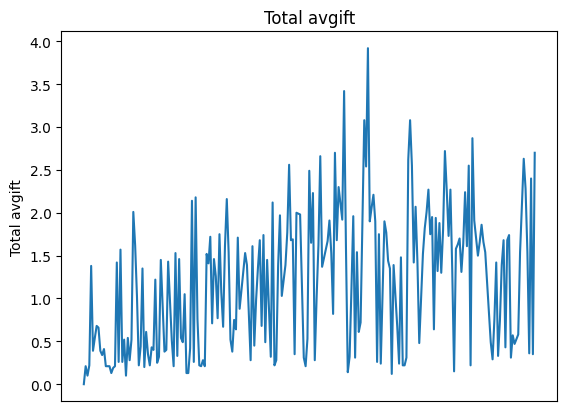

2.545
37.735
51.51


In [4]:
Show_names = list_of_names[0:4]
for Names in Show_names: 
    plt.plot(df[Names])
    plt.ylabel(f"{Names}")
    plt.title(f"{Names}")
    plt.xticks([])
    #print("MaxValue = ", df[Names].max())
    #print("MinValue = ", df[Names].min())
    plt.show()

print(df["Utv. 1 år"].median())
print(df["Utv. 3 år"].median())
print(df["Utv. 5 år"].median())

# Observations 

When the duration is 1 year the return is around 0, there is not enough time for an actual return. When the duration increases to 3 years we see a substantial increase in return due to compound interest starting. 

Interesting to see that the median return jumps from 3 to 37 an 10x increase, whereas year 3 to 5 is only 10%. 
This may be because most of the funds are based on active investing, which by random chanse can see substantial returns, but they do not show consistent growth. 


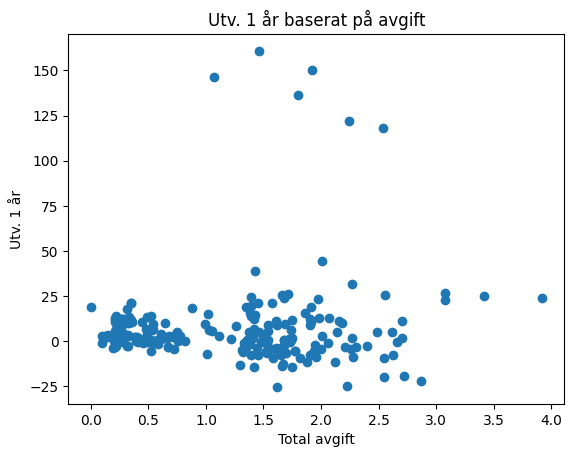

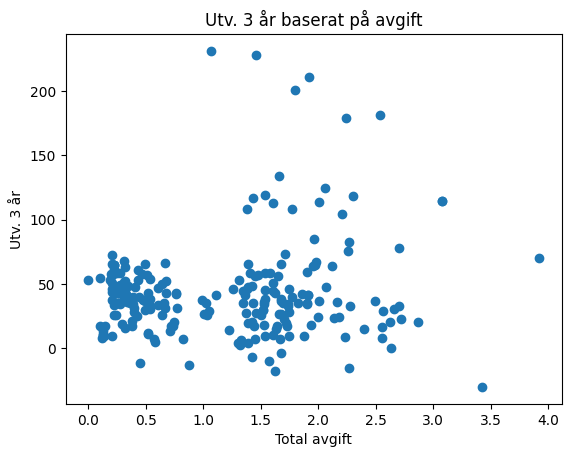

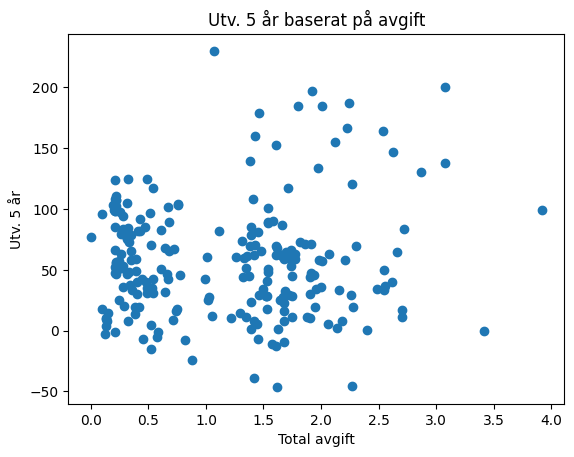

In [5]:
New_names = list_of_names[0:3]
for Names in New_names: 
    if Names == "Total avgift":
        pass
    plt.scatter(df["Total avgift"], df[Names])
    plt.ylabel(f"{Names}")
    plt.xlabel("Total avgift")
    plt.title(f"{Names} baserat på avgift")
    plt.show()

# Observation
Seems evident that higher fee on the funds does not correlate well with the actual return, the data is randomly spread and there are some outliners. 


In [6]:
df[["Total avgift", "Utv. 1 år", "Utv. 3 år", "Utv. 5 år"]].corr()

,Total avgift,Utv. 1 år,Utv. 3 år,Utv. 5 år
Total avgift,1.000000,0.094494,0.136155,0.068629
Utv. 1 år,0.094494,1.000000,0.715634,0.471792
Utv. 3 år,0.136155,0.715634,1.000000,0.753170
Utv. 5 år,0.068629,0.471792,0.753170,1.000000


R2: 0.48615450244366054
MSE: 1487.4562835223746


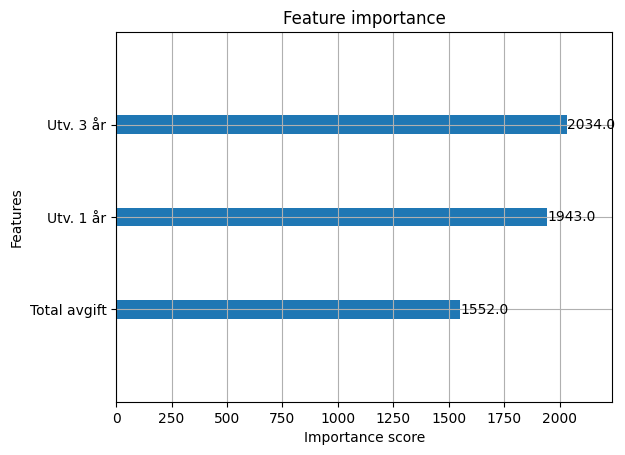

In [7]:
X = df[["Utv. 1 år", "Utv. 3 år", "Total avgift"]]
y = df["Utv. 5 år"]
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
from xgboost import XGBRegressor

model = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)

print("R2:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

import matplotlib.pyplot as plt
from xgboost import plot_importance

plot_importance(model)
plt.show()
